# Evaluación del modelo entrenado previamente

In [1]:
!pwd

/home/mario/Documents/ScenesRecognition-AYUDAME/BoVW


In [2]:
import pickle
from joblib import dump, load
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from BoVW import getBoVWRepresentation

## Carga del modelo y del codebook

In [4]:
model = load("Models/Model02/model02.joblib")
stdSlr = load("Models/Model02/standard_scaler02.joblib")
codebook = np.load("Models/Model02/codebook02.npy")

In [5]:
model.get_params()

{'C': 3.58,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
stdSlr.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [7]:
print(f"mean = {np.mean(stdSlr.mean_)}")
print(f"var = {np.mean(stdSlr.var_)}")

mean = 0.01160576923076923
var = 0.011663043063773743


In [8]:
codebook.shape

(256, 180)

## Carga de los datos de prueba

In [9]:
class_names = np.load("Datasets/data05/class_names_05.npy")
pcd_names = np.load("Datasets/data05/pcd_names_05.npy")
targets = np.load("Datasets/data05/targets_05.npy")
filehandler = open("Datasets/data05/bofs_05.bin", 'rb')
bofs = pickle.load(filehandler)
filehandler.close()

## Análisis exploratorio de datos

In [10]:
class_names

array(['chess', 'fire', 'heads', 'office', 'pumpkin', 'redkitchen',
       'stairs'], dtype='<U10')

In [11]:
print(pcd_names[:3])
print(pcd_names.shape)

['frame-000000' 'frame-000001' 'frame-000002']
(6461,)


In [12]:
print(targets[:3])
print(targets.shape)

[0 0 0]
(6461,)


In [13]:
print(len(bofs))
for bof in bofs[:3]:
    print(bof.shape)

6461
(4, 180)
(4, 180)
(4, 180)


In [14]:
bofs_np = np.vstack(bofs)
bofs_np.shape

(19123, 180)

In [15]:
classes,count_classes = np.unique(targets, return_counts=True)
class_dict = dict(zip(classes.astype('int'),count_classes))
print(class_dict)

{0: 961, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 500}


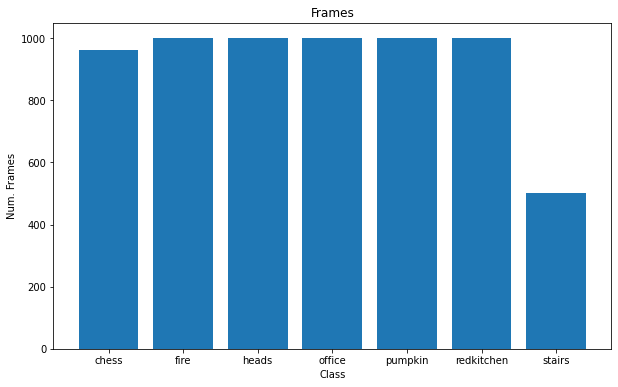

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(classes, count_classes,tick_label=class_names)
plt.title('Frames')
plt.ylabel('Num. Frames')
plt.xlabel('Class')
plt.show()

## Preprocesamiento de datos

Se obtiene la representación BoVW

In [17]:
vw_test = getBoVWRepresentation(bofs,codebook)
vw_test.shape

Processing histogram generation over 6461 samples
The histogram generation took 2.329108[s] CPU, 0.968759[s] real


(6461, 256)

Se estandarizan los datos de prueba

In [18]:
test = vw_test
test = stdSlr.transform(test)

## Validación de resultados

Exactitud del modelo

In [19]:
%%time
y_test = targets # valores reales
acc = 100*model.score(test, y_test)
print(f"La exatitud del modelo es: {acc}")

La exatitud del modelo es: 26.00216684723727
CPU times: user 6.46 s, sys: 53.1 ms, total: 6.51 s
Wall time: 6.59 s


In [20]:
test_pred = model.predict(test)

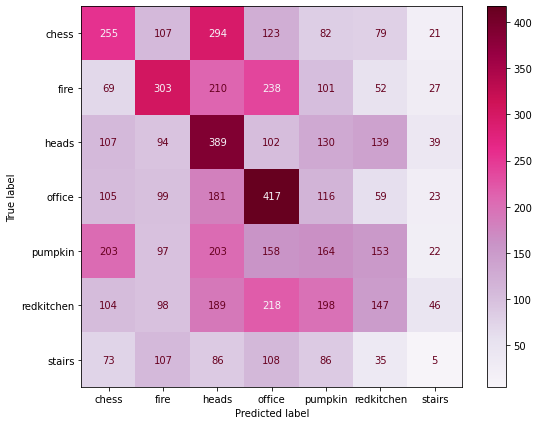

In [21]:
fig, ax = plt.subplots(figsize=(9,7))
cmd = ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_pred,
                                              ax=ax,cmap='PuRd',display_labels=class_names)
plt.show()


In [22]:
print(classification_report(y_true=y_test,y_pred=test_pred,target_names=class_names))

              precision    recall  f1-score   support

       chess       0.28      0.27      0.27       961
        fire       0.33      0.30      0.32      1000
       heads       0.25      0.39      0.30      1000
      office       0.31      0.42      0.35      1000
     pumpkin       0.19      0.16      0.17      1000
  redkitchen       0.22      0.15      0.18      1000
      stairs       0.03      0.01      0.01       500

    accuracy                           0.26      6461
   macro avg       0.23      0.24      0.23      6461
weighted avg       0.24      0.26      0.25      6461

